In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
pd.set_option('display.max_columns', None)

In [232]:
accepted = pd.read_csv("accepted_2007_2011.csv")

In [233]:
accepted.set_index("id", inplace=True)

In [234]:
from sklearn.model_selection import train_test_split

loans = accepted.drop('grade',axis=1)
grade = accepted['grade']
sub_grade = accepted["sub_grade"]
loans_train, loans_test, grade_train, grade_test = train_test_split(loans, grade, test_size=0.2, random_state=42)

In [235]:
loans_train.shape

(31997, 55)

In [236]:
loans_test.shape

(8000, 55)

In [237]:
loans_desc = loans_train.merge(grade_train, left_index=True, right_index=True)

In [238]:
drop_no_var = ["hardship_flag", "disbursement_method", "tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
"policy_code", "collections_12_mths_ex_med", "out_prncp", "out_prncp_inv", "pub_rec", "desc", "loan_status", "initial_list_status"]

In [239]:
loans_desc.drop(drop_no_var, axis=1, inplace = True)

In [240]:
post_loan_list = ["total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                  "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_credit_pull_d", 
                  "last_fico_range_high", "last_fico_range_low", "debt_settlement_flag", "installment"]

In [241]:
post_loan_df = loans_desc[post_loan_list]

In [242]:
pre_loan_df = loans_desc.drop(post_loan_list, axis = 1)

In [243]:
pre_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,grade
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
981750,35000.0,35000.0,35000.000000,60 months,20.30,E5,LIK Managment,2 years,MORTGAGE,81600.0,Verified,2011-10-01,n,debt_consolidation,Personal,PA,15.29,0.0,1998-04-01,685.0,689.0,1.0,17.0,26436.0,76.0,44.0,0.0,E
750093,20000.0,20000.0,20000.000000,60 months,16.89,D4,MultiCare,10+ years,OWN,48000.0,Verified,2011-05-01,n,debt_consolidation,Life Line,WA,6.83,0.0,1993-10-01,700.0,704.0,0.0,6.0,5845.0,34.0,26.0,0.0,D
886824,21000.0,21000.0,19875.000000,60 months,18.64,E1,"Aetna, Inc",10+ years,MORTGAGE,200000.0,Verified,2011-09-01,n,debt_consolidation,Debt Consolidation,CT,10.59,0.0,1994-09-01,680.0,684.0,0.0,12.0,38588.0,87.5,30.0,0.0,E
551238,30000.0,30000.0,28364.692052,60 months,18.99,F3,OneBeacon Insurance Group,5 years,MORTGAGE,87500.0,Verified,2011-03-01,n,debt_consolidation,High Interest Debt Consolidation,MA,11.12,0.0,1995-06-01,680.0,684.0,0.0,7.0,10403.0,54.5,17.0,0.0,F
428826,25000.0,25000.0,17371.065035,36 months,16.00,E2,Johnson & Johnson,10+ years,MORTGAGE,245000.0,Verified,2009-07-01,n,credit_card,I'm too smart to keep paying high rates,NJ,17.93,0.0,1994-03-01,690.0,694.0,6.0,14.0,181638.0,70.7,52.0,0.0,E


In [244]:
pre_loan_df["delinq_2yrs"].value_counts()

0.0     28458
1.0      2696
2.0       572
3.0       185
4.0        54
5.0        14
6.0        10
7.0         4
8.0         2
11.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [245]:
pre_loan_df["grade"].value_counts()

B    9392
A    7654
C    6637
D    4490
E    2518
F     951
G     355
Name: grade, dtype: int64

In [246]:
pre_loan_df["term"].value_counts()

 36 months    23439
 60 months     8558
Name: term, dtype: int64

([<matplotlib.patches.Wedge at 0x1317fa9e8>,
 [Text(-0.7339974370447289, 0.8192971148562466, '36 months'),
  Text(0.7339975137528578, -0.819297046134443, '60 months')])

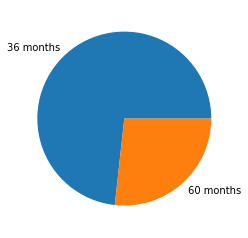

In [247]:
plt.pie(pre_loan_df["term"].value_counts(), labels = ["36 months", "60 months"])

In [248]:
pre_loan_df["home_ownership"].value_counts()

RENT        15238
MORTGAGE    14301
OWN          2356
OTHER         102
Name: home_ownership, dtype: int64

([<matplotlib.patches.Wedge at 0x131a797f0>,
 [Text(0.08205952071881488, 1.0969349274498459, 'Rent'),
  Text(-0.34184925197122945, -1.0455329210152644, 'Mortgage'),
  Text(1.0654350049382746, -0.2735840826001743, 'Own'),
  Text(1.0999448369527087, -0.011016154550452817, 'Other')])

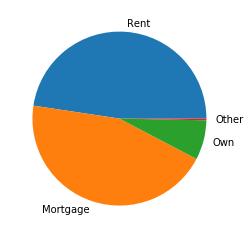

In [249]:
plt.pie(pre_loan_df["home_ownership"].value_counts(), labels = ["Rent", "Mortgage", "Own", "Other"])

In [250]:
pre_loan_df["emp_length"].value_counts()

10+ years    7323
< 1 year     3803
2 years      3675
3 years      3368
4 years      2800
5 years      2718
1 year       2689
6 years      1859
7 years      1470
8 years      1250
9 years      1042
Name: emp_length, dtype: int64

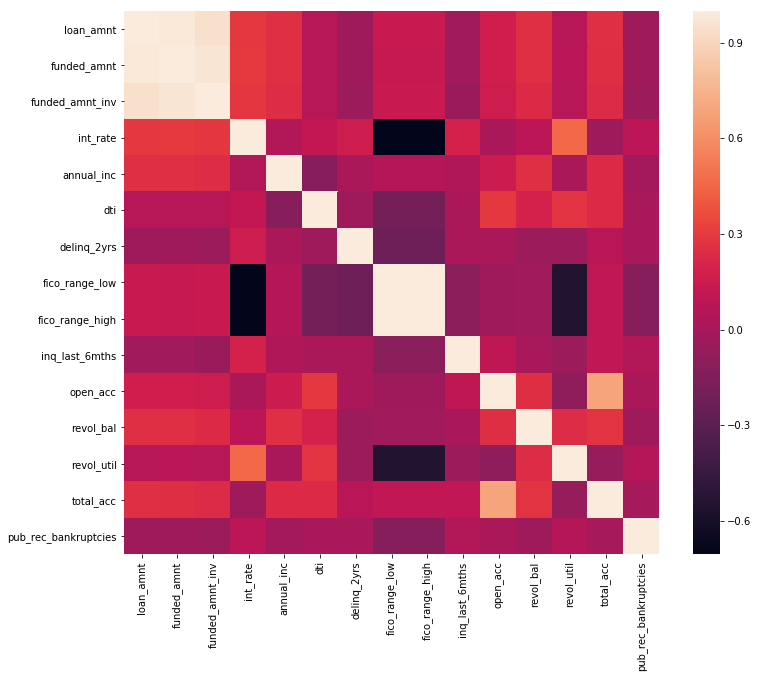

In [251]:
plt.figure(figsize=(12,10))
sns.heatmap(pre_loan_df.corr())

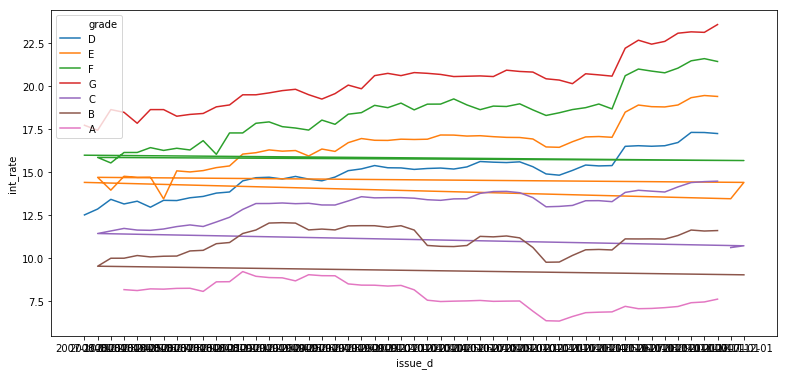

In [230]:
mean_int = pre_loan_df.groupby(["issue_d", "grade"]).mean().reset_index()
plt.figure(figsize=(13, 6))
sns.lineplot(x=mean_int["issue_d"], y=mean_int["int_rate"], hue = mean_int["grade"])

In [254]:
pre_loan_df_dummies = pre_loan_df.drop(["sub_grade", "emp_title", "title", "addr_state", "earliest_cr_line", "issue_d", "grade"], axis = 1)

In [257]:
pre_loan_with_dummies = pd.get_dummies(pre_loan_df_dummies)

### Decision tree training

In [258]:
Xtrain = pre_loan_with_dummies
ytrain = loans_desc["grade"]

In [259]:
from sklearn.tree import DecisionTreeClassifier
grade_class = DecisionTreeClassifier(random_state=0)

In [260]:
grade_class.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [265]:
drop_list_obj = ["sub_grade", "emp_title", "title", "addr_state", "earliest_cr_line", "issue_d"]

In [266]:
loans_test.drop((drop_no_var + post_loan_list + drop_list_obj), axis =1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [267]:
loans_test_with_dummies = pd.get_dummies(loans_test)

In [269]:
grade_class.score(loans_test_with_dummies, grade_test)

0.9645